## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
pymaceuticals_merge = pd.merge(mouse_metadata,study_results, on = "Mouse ID")

# Display the data table for preview
pymaceuticals_merge.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
pymaceuticals_unique = (pymaceuticals_merge["Mouse ID"].nunique())
pymaceuticals_unique


249

In [57]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
pymaceuticals_dup = pymaceuticals_merge.duplicated(subset = ['Mouse ID', 'Timepoint'])
pymaceuticals_dup.count()

Mouse ID              5
Drug Regimen          5
Sex                   5
Age_months            5
Weight (g)            5
Timepoint             5
Tumor Volume (mm3)    5
Metastatic Sites      5
dtype: int64

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
pymaceuticals_merge.loc[pymaceuticals_dup, :]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
pymaceuticals_clean = pymaceuticals_merge.drop_duplicates(subset = ['Mouse ID', 'Timepoint'])

In [6]:
# Checking the number of mice in the clean DataFrame.
pymaceuticals_clean.count()

Mouse ID              1888
Drug Regimen          1888
Sex                   1888
Age_months            1888
Weight (g)            1888
Timepoint             1888
Tumor Volume (mm3)    1888
Metastatic Sites      1888
dtype: int64

## Summary Statistics

In [58]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
pymaceuticals_clean = pymaceuticals_clean.rename(
    columns={"Tumor Volume (mm3)": "Tumor Volume"})
pymaceuticals_drug = pymaceuticals_clean.groupby("Drug Regimen")

#measures of central tendency and variance
mean = pymaceuticals_drug['Tumor Volume'].mean()
median = pymaceuticals_drug['Tumor Volume'].median()
var = pymaceuticals_drug ['Tumor Volume'].var()
std = pymaceuticals_drug ['Tumor Volume'].std()
sem = pymaceuticals_drug ['Tumor Volume'].sem()

#create a dataframe to put those measures in
pymaceuticals_stats = pd.DataFrame({"Mean": mean,
                                   "Median": median,
                                   "Variance": var,
                                   "Standard Deviation": std,
                                   "Standard Error": sem})
pymaceuticals_stats


# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.



,Mean,Median,Variance,Standard Deviation,Standard Error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

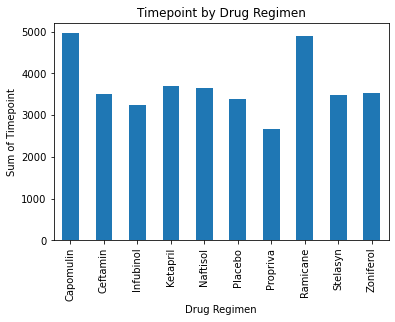

<Figure size 432x288 with 0 Axes>

In [25]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
drugregimen_group = pymaceuticals_clean.groupby('Drug Regimen')
count_timepoint = drugregimen_group['Timepoint'].sum()
timepoint_chart = count_timepoint.plot(kind = 'bar')

timepoint_chart.set_xlabel("Drug Regimen")
timepoint_chart.set_ylabel("Sum of Timepoints")

plt.title("Timepoint by Drug Regimen")

plt.show()
plt.tight_layout()

([<matplotlib.axis.XTick at 0x7fd1ebbc3b20>,
 [Text(0, 0, '4960'),
  Text(1, 0, '3515'),
  Text(2, 0, '3235'),
  Text(3, 0, '3705'),
  Text(4, 0, '3650'),
  Text(5, 0, '3380'),
  Text(6, 0, '2665'),
  Text(7, 0, '4885'),
  Text(8, 0, '3480'),
  Text(9, 0, '3525')])

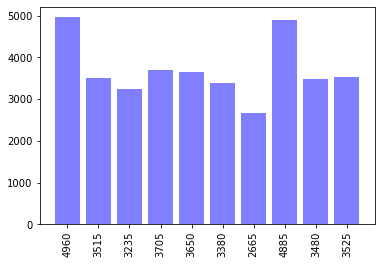

In [34]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
x_axis = np.arange(len(count_timepoint))
tick_locations = [value for value in x_axis]
plt.bar(x_axis,count_timepoint, color = 'b', alpha = .5)
plt.xticks(tick_locations, count_timepoint, rotation = "vertical")


<AxesSubplot:title={'center':'Distribution of Mice by Gender'}, ylabel='Mouse ID'>

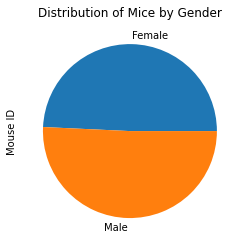

In [63]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

pymaceuticals_gender = pymaceuticals_clean.groupby('Sex')
gender_count = pymaceuticals_gender['Mouse ID'].count()
gender_pie = gender_count.plot(kind = "pie", title = "Distribution of Mice by Gender")
plt.show()

In [68]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
pymaceuticals_gender = pymaceuticals_clean.groupby('Sex')
gender_count = pymaceuticals_gender.count()
pymaceuticals_genderdf = pd.DataFrame(gender_count)
#plt.pie(pymaceuticals_genderdf)
#plt.title("Distribution of Mice by Gender")

## Quartiles, Outliers and Boxplots

In [81]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
pymaceuticals_tumor = pymaceuticals_clean.groupby('Mouse ID').max()['Timepoint']
pymaceuticals_tumordf = pd.DataFrame(pymaceuticals_tumor)

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
tumor_merge = pd.merge(pymaceuticals_tumordf,study_results, on = ("Mouse ID","Timepoint"))
tumor_merge.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,45,67.973419,2
1,a251,45,65.525743,1
2,a262,45,70.717621,4
3,a275,45,62.999356,3
4,a366,30,63.440686,1


In [ ]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
